<a href="https://colab.research.google.com/github/MTracchia/Laboratorio-de-Datos/blob/main/EstadisticaDescriptiva_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experimentos numéricos

En esta sección vamos realizar algunos experimentos numéricos. De paso ponemos en práctica herramientas de visualización y análisis.

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 

### Robustez de estadísticos

En este primer experimento vemos el efecto que tiene sobre algunos observables la presencia de un outlier. Vamos a ver que mientras que la media se ve seriamente afectada, la mediana y los cuantiles son bastantes robustos.

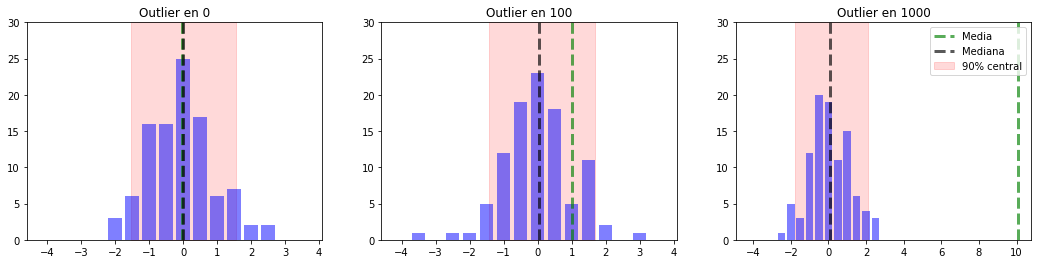

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (18, 4))
fig_index = 0

for outlier in [0, 100, 1000]:

  # Creamos una muestra con una distribución normal y agregamos un outlier en algún lado.
  muestra = stats.norm.rvs(loc = 0.00, scale = 1.00, size = 99)
  muestra = np.append(muestra, outlier)

  # Histograma
  ax[fig_index].hist(muestra, bins = np.arange(-4.25, 4.25, 0.50), rwidth = 0.80, color = 'b', alpha = 0.50)

  # Grafico de la media, mediana y cuantile
  ax[fig_index].vlines(x = np.mean(muestra), ymin = 0, ymax = 30, linewidth = 3, linestyle = '--', alpha = 0.65, color = 'g', label = 'Media')
  ax[fig_index].vlines(x = np.median(muestra), ymin = 0, ymax = 30, linewidth = 3, linestyle = '--', alpha = 0.65, color = 'k', label = 'Mediana')
  ax[fig_index].fill_between(x = np.quantile(muestra, [0.05, 0.95]), y1 = 30, color = 'r', alpha = 0.15, label = '90% central')
  ax[fig_index].set_ylim([0, 30])
  if fig_index == 2:
    ax[fig_index].legend(loc = 'best')
  ax[fig_index].set_title('Outlier en {}'.format(outlier))
  
  fig_index += 1

plt.show()

### Correlación

Veamos un ejemplo sencillo donde comparamos los coeficientes de correlación de Pearson y Spearman. Recordemos que:
- **Pearson** mide la **relación lineal** entre dos variables, por lo tanto cuando la relación es no lineal puede subestimar la vinculación entre dichas variables.
- Por otro lado, **Spearman** detecta **relaciones monótonas** entre las variables. Es decir, detecta si cuando una de las variables aumenta (o disminuye) la otra también lo hace, independientemente de cómo sea esa relación (lineal o no lineal).

En el siguiente experimento numérico vemos cuánto dan los coeficientes para dos variables $x$ e $y$, donde $y$ esta descorrelacionada de $x$ ($y \sim x^0$), linealmente relacionada ($y \sim x$) y monotonámente ligada a $x$ ($y \sim x^7$, por ejemplo). A la variable $y$ le agregamos un ruido gaussiano para simular una medición real.

Los coeficientes los calculamos con:
~~~
from scipy.stats import pearsonr, spearmanr

coeff_p = pearsonr(x,y)[0]
coeff_s = spearmanr(x,y)[0]
~~~
El índice 0 es para tomar efectivamente el valor del coeficiente, dado que estas funciones devuelven además un p-valor correspondiente a un test de hipótesis realizado, que dicen si estas correlaciones son estadísticamente significativas o no (cuidado con esto! hay que chequear siempre las hipótesis detrás). En todo caso, consultar la documentación de [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), donde indica qué asume al momento de realizar el test.


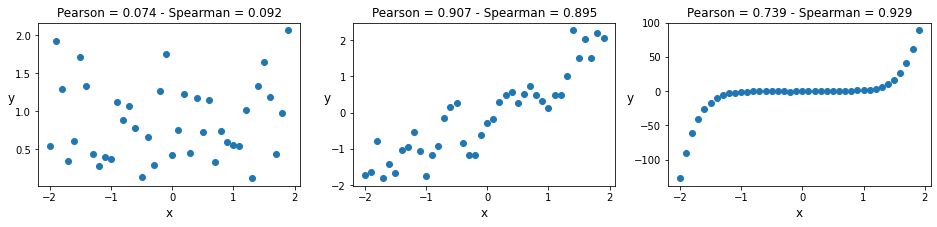

In [ ]:
# Medidas de correlación pearson y spearman
from scipy.stats import pearsonr, spearmanr

# Rango de x 
x = np.arange(-2.00, 2.00, 0.10)

# Relación de y con x: y ~ x^exponente
exponents = [0, 1, 7]

fig, ax = plt.subplots(1, 3, figsize = (16,3))
for i in range(3):

  # Calculamos "y" agregandole un poco de ruido 
  # (Esto es una lista por compresión, que permite crear listas rápidamente)
  y = [np.random.normal(loc = mu**exponents[i], scale = 0.50) for mu in x]

  # Gráficos
  ax[i].scatter(x, y)
  ax[i].set_title('Pearson = {:.3f} - Spearman = {:.3f}'.format(pearsonr(x, y)[0], spearmanr(x, y)[0]))
  ax[i].set_xlabel('x', size = 12)
  ax[i].set_ylabel('y', rotation = 0, size = 12)

plt.show()

Tener siempre presente que si las variables están relacionadas no monótonamente (ej, $y \sim x^2$), ninguno de los coeficientes va a ser capaz de captar dicha relación. Dicho de otro modo, un coeficiente de correlación bajo no necesariamente implica que las variables sean independendientes.

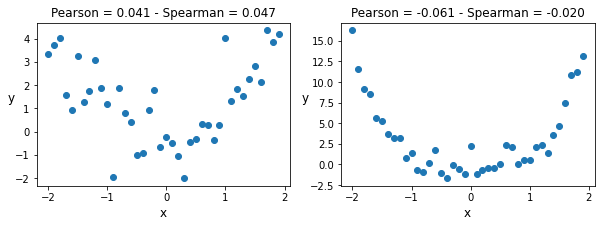

In [ ]:
# Mismo código de arriba, pero ahora y ~ x^2 o y ~ x^4
exponents = [2, 4]

fig, ax = plt.subplots(1, 2, figsize = (10,3))
for i in range(2):

  y = [np.random.normal(loc = mu**exponents[i], scale = 1.00) for mu in x]

  ax[i].scatter(x, y)
  ax[i].set_title('Pearson = {:.3f} - Spearman = {:.3f}'.format(pearsonr(x, y)[0], spearmanr(x, y)[0]))
  ax[i].set_xlabel('x', size = 12)
  ax[i].set_ylabel('y', rotation = 0, size = 12)

plt.show()

### Teorema central del límite 

El teorema central del límite nos dice que el promedio $\bar X$ de $n$ variables aleatorias con media $\mu$ y desviación $\sigma$ es a su vez una variable aleatoria que se distribuye normalmente con media $\mu$ y desviación $\frac{\sigma}{\sqrt{n}}$. 
Esto significa que cuando calculamos el promedio de un conjunto de datos estamos estimando el valor medio de la población y por el otro lado podemos determinar un rango de error de nuestra estimación, que se hace más chico a medida que promediemos más datos.

Lo fuerte de este teorema es que no importa qué distribución tienen los datos, solo hace falta que tengan valor medio y desviación bien definidos.

Probamos primero con variables normalmente distribuidas y luego cambiamos de distribución.

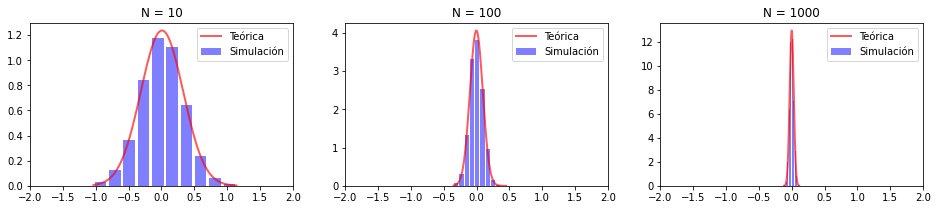

In [ ]:
# Variables normalmente distribuidas

fig, ax = plt.subplots(1, 3, figsize = (16, 3))
fig_index = 0

# Barremos en el tamaño de la muestra
for N in [10, 100, 1000]:

  sample_means = []

  # Simulamos 2500 veces en la que calculamos el promedio de n variables aleatorias
  for iteration in range(2500):

    sample = np.random.normal(loc = 0.00, scale = 1.00, size = N)
    sample_means.append(np.mean(sample))

  ax[fig_index].hist(sample_means, bins = 10, rwidth = 0.8, density = True, color = 'b', alpha = 0.50)

  x = np.arange(np.min(sample_means), np.max(sample_means), 0.001)
  
  # Distribución teórica según teorema central del límite
  ax[fig_index].plot(x, stats.norm.pdf(x, loc = np.mean(sample_means), scale = np.std(sample_means)), color = 'r', linewidth = 2, alpha = 0.65)
  
  ax[fig_index].set_xlim([-2, 2])
  ax[fig_index].set_title('N = {}'.format(N))
  ax[fig_index].legend(['Teórica', 'Simulación',])

  fig_index += 1

plt.show()

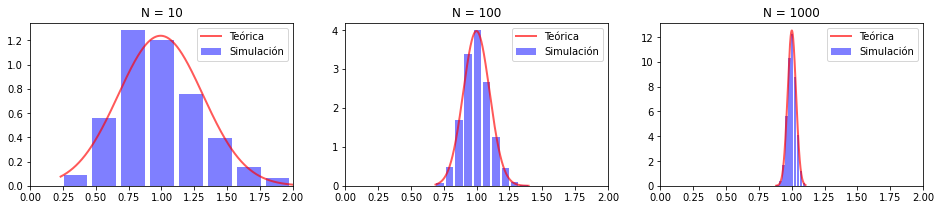

In [ ]:
# Otra distribución con media y desviación bien definida
# Ejemplo, distribucion exponencial
distribution = stats.expon()

fig, ax = plt.subplots(1, 3, figsize = (16, 3))
fig_index = 0

# Barremos en el tamaño de la muestra
for N in [10, 100, 1000]:

  sample_means = []

  # Simulamos 2500 veces en la que calculamos el promedio de n variables aleatorias
  for iteration in range(2500):

    sample = distribution.rvs(size = N)
    sample_means.append(np.mean(sample))

  ax[fig_index].hist(sample_means, bins = 10, rwidth = 0.8, density = True, color = 'b', alpha = 0.50)

  x = np.arange(np.min(sample_means), np.max(sample_means), 0.001)

  # Distribución teórica según teorema central del límite
  ax[fig_index].plot(x, stats.norm.pdf(x, loc = np.mean(sample_means), scale = np.std(sample_means)), color = 'r', linewidth = 2, alpha = 0.65)
  
  ax[fig_index].set_xlim([0.0, 2.00])
  ax[fig_index].set_title('N = {}'.format(N))
  ax[fig_index].legend(['Teórica', 'Simulación',])

  fig_index += 1

plt.show()

### Ley de grandes números

Si tenemos un conjunto de $N$ variables aleatorias independientes con valor medio $\mu$ y desviación $\sigma$, a medida que el tamaño de la muestra crece, el promedio $\bar X  = \frac{1}{N} \sum_i^N X_i$ tiende a $\mu$, es decir $\hat X \to \mu$ cuando $N \to \infty$.

Por el teorema central del límite, podemos a su vez asociar una barra de error al promedio dada por $\sqrt{\frac{S^2}{N}}$, donde $S^2 = \frac{1}{N-1} \sum_i (X_i - \bar X)^2$.

**Observación:** formalmente se dice que $\bar X $ converge en probabilidad a $\mu$,  es decir la probabilidad de $\bar X $ esté lejos de $\mu$ se va a cero a medida que aumenta la muestra.

La ley de los grandes números nos dice algo que intuímos: más datos es mejor, siempre y cuando estos sean independientes y vengan de una buena distribución...cosa que no siempre sucede.

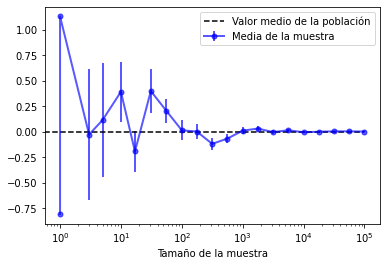

In [ ]:
sample_means = []
sample_errors = []

# Barremos en distintos valores de N 
N_range = [int(n) for n in np.logspace(0, 5, 21)]
for N in N_range:

  # Tomamos numeros aleatorios normalmente distribuidos y calculamos el promedio y el error
  sample = np.random.normal(loc = 0.00, scale = 1.00, size = N)
  sample_means.append(np.mean(sample))

  error = np.std(sample)/np.sqrt(N)
  sample_errors.append(error)

# Grafico con barras de error
plt.errorbar(x = N_range, y = sample_means, yerr = sample_errors, fmt ='b.-', linewidth = 2, markersize = 10, alpha = 0.65, label = 'Media de la muestra')
plt.hlines(y = 0.00, xmin = 0, xmax = np.max(N_range), linestyles='--', label = 'Valor medio de la población')
plt.xscale('log')
plt.xlabel('Tamaño de la muestra')
plt.legend(loc = 'best')
plt.show()

Y esta es la cosa que no siempre sucede: un requisito fundamental para que el promedio converja a la media es que los datos sigan una distribución con media y desviación bien definida. La distribución de Cauchy, por ejemplo, no cumple esto. Notar que este caso tomar más datos no es mejor.

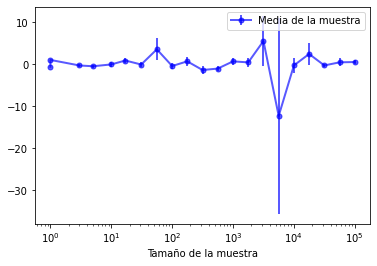

In [ ]:
sample_means = []
sample_errors = []

# Barremos en distintos valores de N 
N_range = [int(n) for n in np.logspace(0, 5, 21)]
for N in N_range:

  # Tomamos numeros aleatorios distribuidos por Cauchy y calculamos el promedio y el error
  sample = stats.cauchy.rvs(size = N)
  sample_means.append(np.mean(sample))

  error = np.std(sample)/np.sqrt(N)
  sample_errors.append(error)

# Grafico con barras de error
plt.errorbar(x = N_range, y = sample_means, yerr = sample_errors, fmt ='b.-', linewidth = 2, markersize = 10, alpha = 0.65, label = 'Media de la muestra')
plt.xscale('log')
plt.xlabel('Tamaño de la muestra')
plt.legend(loc = 'best')
plt.show()